<a href="https://colab.research.google.com/github/suchitsharma2004/Convolutional_Neural_Network/blob/main/Lung_Diseases_VGG16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

hello world


In [1]:
!pip install opendatasets
!pip install pandas

In [2]:
import opendatasets as od
import pandas

od.download("https://www.kaggle.com/datasets/omkarmanohardalvi/lungs-disease-dataset-4-types")


100%|██████████| 2.02G/2.02G [01:49<00:00, 19.9MB/s]


In [3]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

# re-size all the images to this
IMAGE_SIZE = [224, 224]

In [4]:
train_path = 'lungs_4/train'
valid_path = 'lungs_4/test'

In [5]:
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

58889256/58889256 [==============================] - 4s 0us/step


In [11]:
for layer in vgg.layers:
  layer.trainable = False



  # useful for getting number of classes
folders = glob('lungs_4/disease/train/*')

In [12]:
x = Flatten()(vgg.output)
# x = Dense(1000, activation='relu')(x)
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

# view the structure of the model
model.summary()

# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [13]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('lungs_4/disease/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('lungs_4/disease/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')


Found 6054 images belonging to 5 classes.
Found 2025 images belonging to 5 classes.


In [14]:
len(folders)

5

In [15]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

<ipython-input-15-89113a27acbd>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/5
190/190 [==============================] - 190s 994ms/step - loss: 0.7084 - accuracy: 0.7246 - val_loss: 0.5778 - val_accuracy: 0.7565
Epoch 2/5
190/190 [==============================] - 189s 994ms/step - loss: 0.4678 - accuracy: 0.8095 - val_loss: 0.5909 - val_accuracy: 0.8040
Epoch 3/5
190/190 [==============================] - 176s 924ms/step - loss: 0.4625 - accuracy: 0.8168 - val_loss: 0.4842 - val_accuracy: 0.8212
Epoch 4/5
190/190 [==============================] - 178s 938ms/step - loss: 0.4018 - accuracy: 0.8307 - val_loss: 0.4063 - val_accuracy: 0.8469
Epoch 5/5
190/190 [==============================] - 180s 950ms/step - loss: 0.3534 - accuracy: 0.8545 - val_loss: 0.4675 - val_accuracy: 0.8212


# New Section

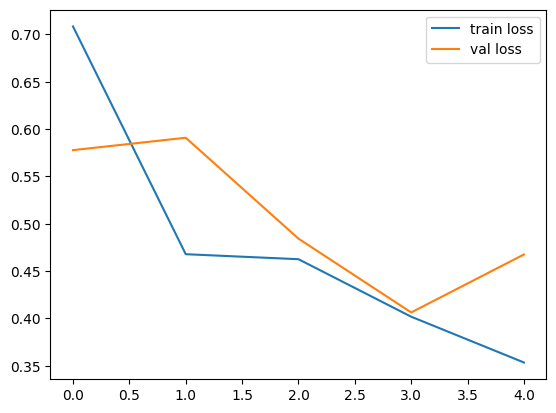

<Figure size 640x480 with 0 Axes>

In [16]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

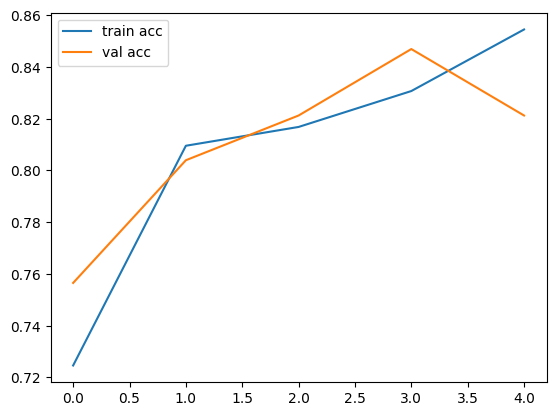

<Figure size 640x480 with 0 Axes>

In [18]:
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')